In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Read clinical and other features

In [2]:
df_clinical_features = pd.read_excel(
    '../data/Clinical_and_Other_Features.xlsx',
    header=[1],
    skiprows=[2]
)
print(f"Clinical and other features shape: {df_clinical_features.shape}")
df_clinical_features.head()

Clinical and other features shape: (922, 98)


,Patient ID,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,Scan Options,Field Strength (Tesla),Patient Position During MRI,Image Position of Patient,Contrast Agent,Contrast Bolus Volume (mL),...,Therapeutic or Prophylactic Oophorectomy as part of Endocrine Therapy,Neoadjuvant Anti-Her2 Neu Therapy,Adjuvant Anti-Her2 Neu Therapy,Received Neoadjuvant Therapy or Not,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
0,Breast_MRI_001,6,2,0,5,1,0,-191.8003 X -176.1259 X 86.6065,1.0,15.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,Breast_MRI_002,12,0,4,1,3,0,154.724 X 176.048 X 94.5771,1.0,NaN,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,Breast_MRI_003,10,0,3,2,3,0,174.658 X 228.317 X 88.4878,1.0,NaN,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,Breast_MRI_004,18,0,4,1,1,0,188.148 X 194.282 X 94.1832,1.0,NaN,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Breast_MRI_005,12,2,0,5,1,1,-173.063 X -150.7869 X 59.161,1.0,5.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0


## Read image features

In [3]:
df_image_features = pd.read_excel('../data/Imaging_Features.xlsx')
print(f'Image features shape: {df_image_features.shape}')
df_image_features.head()

Image features shape: (922, 530)


,Patient ID,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)","F1_DT_POSTCON (T11=0.2,T12=0.8)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,1.000000,0.120721,0.530395,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,1.000000,0.129546,0.485217,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,0.174775,0.062051,0.069910,0.132265,0.330662,0.349550,0.661324,0.699100,1.00000,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_004,0.086546,0.045111,0.034619,0.051265,0.128162,0.173093,0.256325,0.346185,0.51265,...,3.389678,-0.017802,0.363818,0.177210,0.960705,0.996827,33.499175,69.164227,1.171314,8.493319
4,Breast_MRI_005,0.289669,0.052031,0.115868,0.378575,0.839984,0.579338,1.000000,0.958287,1.00000,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451


## Read Lunit predictions

In [4]:
df_lunit_preds = pd.read_excel('../data/lunit_predictions.xlsx')
print(f'Lunit predictions shape: {df_lunit_preds.shape}')
df_lunit_preds.head()

Lunit predictions shape: (305, 3)


,Patient ID,y_score_0,y_score_1
0,Breast_MRI_549,0.2646,0.7354
1,Breast_MRI_247,0.1412,0.8588
2,Breast_MRI_878,0.3014,0.6986
3,Breast_MRI_875,0.1114,0.8886
4,Breast_MRI_632,0.1778,0.8222


## Split samples to train/test

In [5]:
df_clinical_features['subset'] = df_clinical_features['Patient ID'].isin(df_lunit_preds['Patient ID']).replace(
    {True: 'test', False: 'train'}
)
df_clinical_features['subset'].value_counts()

subset
train    617
test     305
Name: count, dtype: int64

## ER distribution on train/test

In [6]:
df_clinical_features.groupby('subset')['ER'].value_counts(normalize=True)

subset  ER
test    1     0.744262
        0     0.255738
train   1     0.743922
        0     0.256078
Name: proportion, dtype: float64

## ER conditioned on Manufacturer

In [7]:
df_clinical_features.groupby(['subset', 'Manufacturer'])['ER'].value_counts(normalize=True)

subset  Manufacturer  ER
test    0             1     0.741784
                      0     0.258216
        2             1     0.750000
                      0     0.250000
train   0             1     0.759036
                      0     0.240964
        2             1     0.712871
                      0     0.287129
Name: proportion, dtype: float64

## Separate image features to train/test

In [8]:
image_features_cols = df_image_features.columns[1:]

df_image_features = df_image_features.merge(
    right=df_clinical_features[['Patient ID', 'subset', 'ER']],
    on='Patient ID'
)
df_image_features_train = df_image_features[df_image_features['subset'] == 'train']
df_image_features_test = df_image_features[df_image_features['subset'] == 'test']
df_image_features_train.shape, df_image_features_test.shape

((617, 532), (305, 532))

## Number of missing values per feature (for simplicity, I provide only features that actually miss values)

<Axes: >

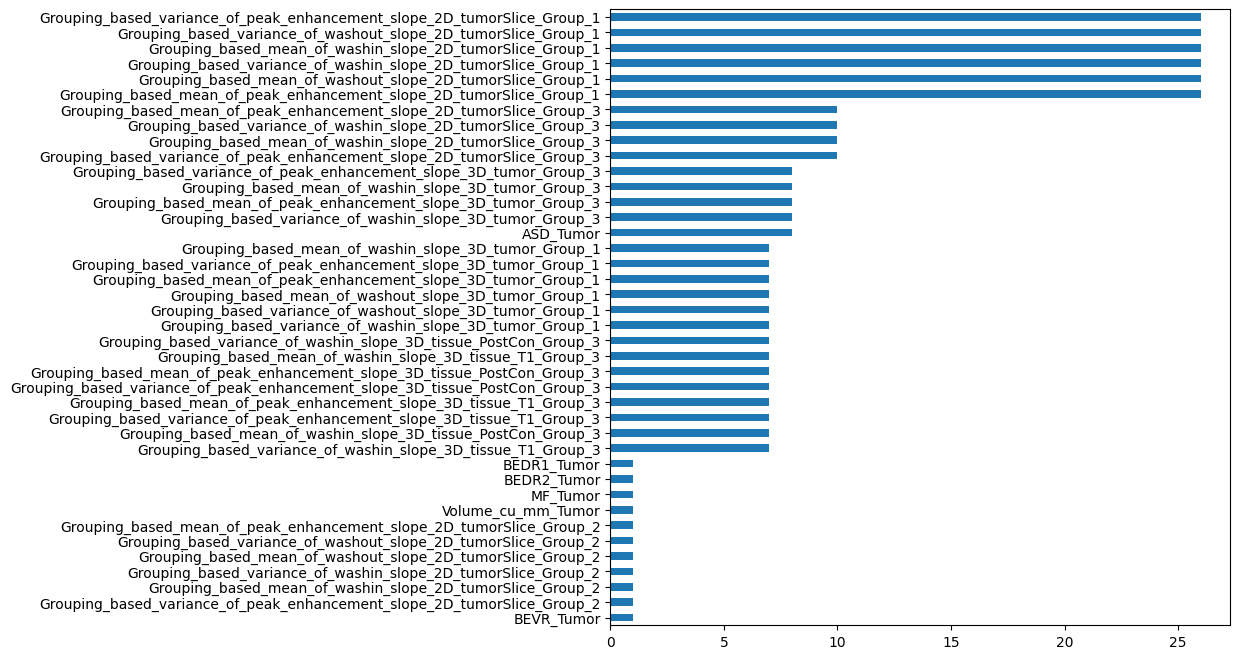

In [9]:
feature2nan_cnt = df_image_features_train[image_features_cols].isna().sum()
feature2nan_cnt[feature2nan_cnt > 0].sort_values().plot(kind='barh', figsize=(8, 8))

## Number of samples that have missing values

In [10]:
sample2nan_cnt = df_image_features_train[image_features_cols].isna().sum(axis=1)
sample2nan_cnt[sample2nan_cnt > 0].shape[0]

39

## NaN total count

In [11]:
df_image_features_train[image_features_cols].isna().sum().sum()

345

## Distribution plots for random subsample of features (conditioned on ER)

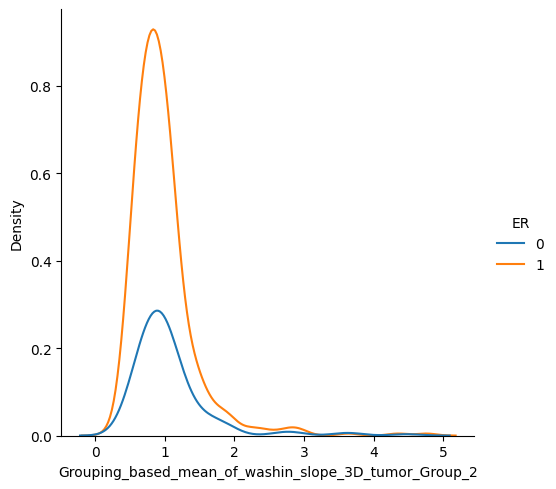

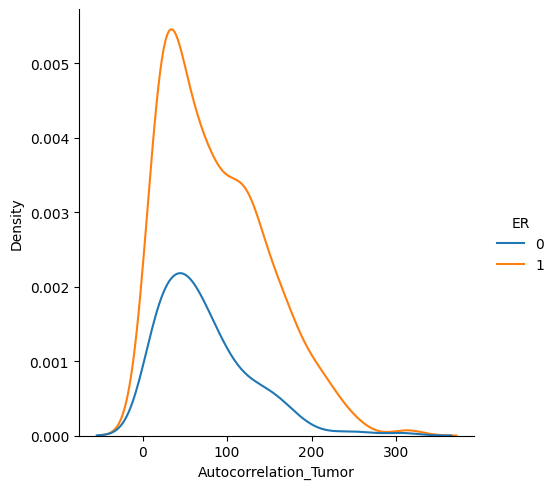

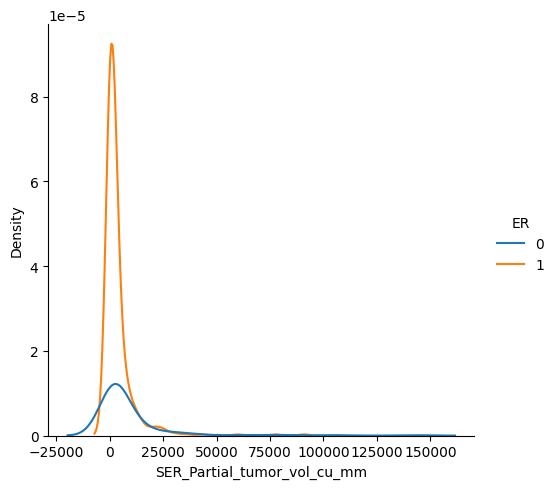

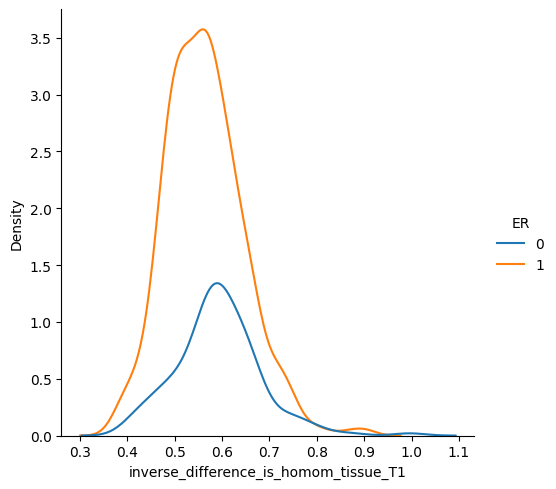

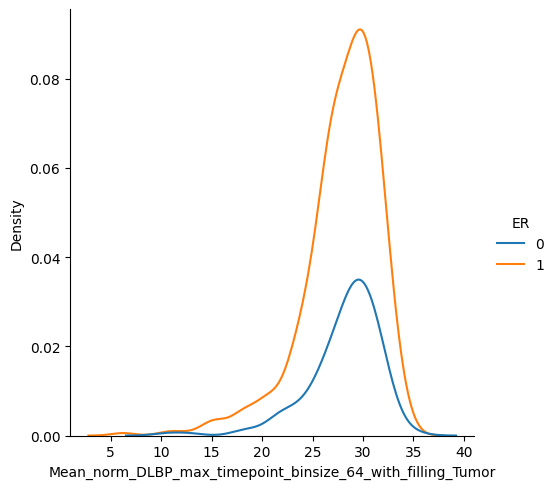

In [12]:
k = 5
seed = 42

random.seed(seed)
subset_indices = random.sample(population=range(len(image_features_cols)), k=k)
subset_cols = [image_features_cols[i] for i in subset_indices]
for col in subset_cols:
    sns.displot(
        data=df_image_features_train,
        x=col,
        hue='ER',
        kind='kde',
        label=col
    )
    plt.show()

## Pairwise Pearson correlation between image features. For simplicity, I omit statistical testing because it requires checking additional criteria (obviously, not all features are distributed normally)

In [13]:
features_pearson_corr = df_image_features_train[image_features_cols].corr().abs()
features_pearson_corr

,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)","F1_DT_POSTCON (T11=0.2,T12=0.8)","F1_DT_T1NFS (T11=0.05,T12=0.5)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
"F1_DT_POSTCON (T11=0.05,T12=0.5)",1.000000,0.462993,0.881354,0.966515,0.835470,0.899229,0.617784,0.638185,0.350346,0.795890,...,0.294904,0.095200,0.012938,0.317357,0.282236,0.227536,0.225538,0.166727,0.269656,0.042932
"F1_DT_POSTCON (T11=0.05,T12=0.1)",0.462993,1.000000,0.507012,0.391848,0.346325,0.410505,0.273905,0.317597,0.169601,0.411014,...,0.200020,0.001103,0.033528,0.199118,0.207165,0.189499,0.007763,0.114531,0.163994,0.008839
"F1_DT_POSTCON (T11=0.02,T12=0.5)",0.881354,0.507012,1.000000,0.836259,0.647178,0.708184,0.455095,0.471672,0.250524,0.733601,...,0.280663,0.069873,0.008714,0.297087,0.266039,0.218868,0.207795,0.157495,0.263118,0.036362
"F1_DT_POSTCON (T11=0.02,T12=0.8)",0.966515,0.391848,0.836259,1.000000,0.860438,0.889337,0.622963,0.623234,0.346332,0.794152,...,0.254204,0.098394,0.022871,0.275064,0.235043,0.178462,0.253906,0.219849,0.247002,0.049055
"F1_DT_POSTCON (T11=0.05,T12=0.8)",0.835470,0.346325,0.647178,0.860438,1.000000,0.957849,0.845224,0.828971,0.508594,0.693932,...,0.241004,0.112577,0.046623,0.265210,0.226709,0.171745,0.203142,0.158485,0.243801,0.042763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,0.227536,0.189499,0.218868,0.178462,0.171745,0.219324,0.177412,0.228825,0.157384,0.080369,...,0.886682,0.119322,0.054297,0.773944,0.958169,1.000000,0.199717,0.012026,0.547587,0.033180
WashinRate_map_mean_tissue_PostCon,0.225538,0.007763,0.207795,0.253906,0.203142,0.217338,0.155310,0.157320,0.111403,0.226174,...,0.201269,0.118739,0.211274,0.183314,0.190818,0.199717,1.000000,0.922715,0.049245,0.030786
WashinRate_map_std_dev_tissue_PostCon,0.166727,0.114531,0.157495,0.219849,0.158485,0.149338,0.111650,0.081621,0.073212,0.187888,...,0.046928,0.073417,0.139297,0.055254,0.015306,0.012026,0.922715,1.000000,0.173168,0.050774
WashinRate_map_skewness_tissue_PostCon,0.269656,0.163994,0.263118,0.247002,0.243801,0.245379,0.233554,0.230910,0.182660,0.104561,...,0.688643,0.190608,0.049136,0.686963,0.648503,0.547587,0.049245,0.173168,1.000000,0.073122


## Percentage of feature pairs that have high Pearson abs correlation (>= 0.5)

In [14]:
corr_threshold = 0.5
round_to = 2

n = len(image_features_cols)
high_corr_pair_num = ((features_pearson_corr >= corr_threshold).sum().sum() - n) / 2
total_pair_num  = n * (n - 1) / 2
round(100 * high_corr_pair_num / total_pair_num, round_to)

5.53

## Features median values: min/avg/median/max

In [15]:
features_medians = df_image_features_train[image_features_cols].median()
f'min={features_medians.min()}, avg={features_medians.mean()}, median={features_medians.median()}, max={features_medians.max()}'

'min=-131349.76766977, avg=219826.6290833708, median=0.873336154497192, max=97301105.3684792'

## As we can see, features are not on the same scale. This means that we need some sort of normalization if we want to use a metric methods like KNN, Logistic Regression, etc.